In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter

%matplotlib inline

C:\Users\animesh.padhy\AppData\Local\Temp\ipykernel_18512\632197756.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
raw_boston = pd.read_csv('datasets/housing.csv', header = None, delimiter = r"\s+", names = column_names)

preprocessing.

In [3]:
scaled_boston = raw_boston.copy()

In [4]:
from sklearn.preprocessing import StandardScaler

col_names = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
features = scaled_boston[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_boston[col_names] = features

# Ridge Regression (L2 Regularization)

In [5]:
X = scaled_boston.iloc[:, :-1].values
y = scaled_boston.iloc[:, -1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [8]:
from sklearn.linear_model import Ridge

# Creating and training model
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = ridge_reg.predict(X_test)

**alpha:** 
- The regularization strength, which controls the amount of shrinkage applied to the coefficients. 
- Higher values of alpha result in more shrinkage, effectively reducing the influence of individual features on the model's predictions. 
- Alpha must be a positive float. Typically, alpha is chosen through techniques like cross-validation.

**solver:** 
- The method used to compute the coefficients. 
- Different solvers are available, each with its own computational advantages and disadvantages. 
- Some common solvers include "auto", "svd", "cholesky", "lsqr", and "sparse_cg".

Here,
- **alpha** is set to 1, indicating moderate regularization strength.
- **solver** is set to "cholesky", which uses the Cholesky decomposition method to solve the optimization problem efficiently for dense data.

In [9]:
# Predicting Cross Validation Score
cv_ridge = cross_val_score(estimator = ridge_reg, X = X_train, y = y_train, cv = 10)

# Calculating Adjusted R-squared
r2 = ridge_reg.score(X_test, y_test)
# Number of observations is the shape along axis 0
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# Adjusted R-squared formula
ridge_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
ridge_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
ridge_R2 = ridge_reg.score(X_test, y_test)
ridgeCV_R2 = cv_ridge.mean()

print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4) )
print('R2:', round( ridge_reg.score(X_test, y_test),4) )
print('Adjusted R2:', round(ridge_adjusted_r2, 4) )
print("Cross Validated R2: ", round( cv_ridge.mean(),4) )


RMSE: 4.6403
R2: 0.711
Adjusted R2: 0.6838
Cross Validated R2:  0.6882


Text(0.5, 1.0, 'Ridge Regression model')

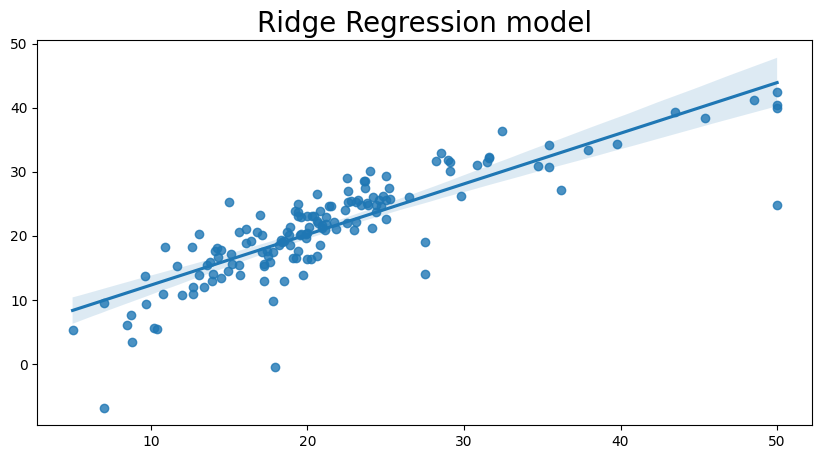

In [10]:
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred)
plt.title('Ridge Regression model', fontsize = 20)

# Lasso Regression (L1 Regularization)

In [11]:
from sklearn.linear_model import Lasso

# Creating and training model
lasso_reg = Lasso(alpha=0.2)
lasso_reg.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = lasso_reg.predict(X_test)

**alpha:** 
- The regularization strength, controlling the amount of shrinkage applied to the coefficients. 
- Higher values of alpha result in more shrinkage, leading to more coefficients being pushed to zero. 
- Alpha must be a positive float. 
- alpha is typically chosen through techniques like cross-validation.

**solver:** 
- The optimization algorithm used to compute the coefficients. 
- Lasso regression can be solved using different algorithms, each with its own computational characteristics
- Common solvers include "coordinate descent" and "least angle regression (LARS)".

Here,
- **alpha** is set to 0.2, indicating a moderate regularization strength.
- The default solver for Lasso is coordinate descent.

In [12]:
# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_reg, X = X_train, y = y_train, cv = 10)

# Calculating Adjusted R-squared
r2 = lasso_reg.score(X_test, y_test)
# Number of observations is the shape along axis 0
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# Adjusted R-squared formula
lasso_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
lasso_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
lasso_R2 = lasso_reg.score(X_test, y_test)
lassoCV_R2 = cv_lasso.mean()

print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4) )
print('R2:', round( lasso_reg.score(X_test, y_test),4) )
print('Adjusted R2:', round( lasso_adjusted_r2,4) )
print("Cross Validated R2:", round( cv_lasso.mean(),4) )

RMSE: 4.877
R2: 0.6808
Adjusted R2: 0.6507
Cross Validated R2: 0.674


Text(0.5, 1.0, 'Lasso Regression model')

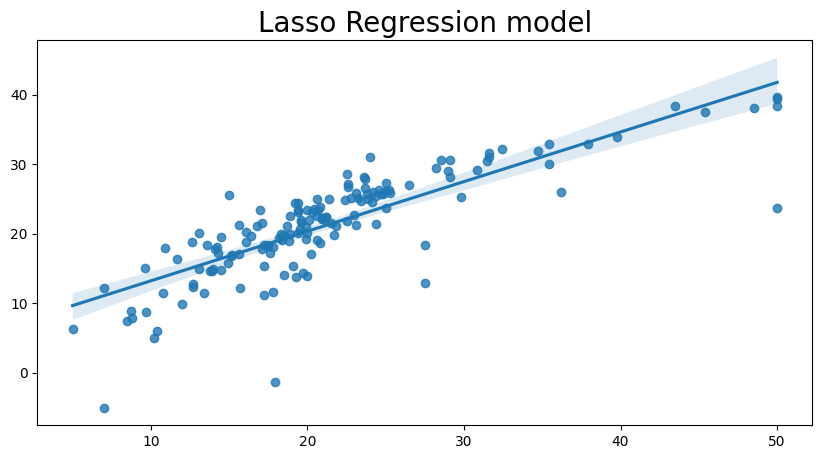

In [13]:
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred)
plt.title('Lasso Regression model', fontsize = 20)